## Lecture 8: Calibration Data, Confidence Intervals, and Correlation Analysis

### Introduction

Calibration data is a set of data that is used to establish a relationship between two variables. This relationship is typically linear, and is used to predict the value of one variable based on the value of the other variable. In this lecture, we will discuss how to analyze calibration data, including how to calculate confidence intervals for the slope and intercept of the calibration curve, and how to perform correlation analysis to assess the strength of the relationship between the two variables.

### Calibration Data

Imagine you are an analytical chemist working for a major brewing company. You have been tasked with developing a new method for measuring the diacetyl concentration in beer. Diacetyl is a compound that is produced during fermentation and is responsible for the buttery flavor in beer. The company wants to ensure that the diacetyl concentration in their beer is below a certain threshold to maintain the desired flavor profile.

After having done some research, you recommend to your company that a ultraviolet-visible (UV-Vis) spectrophotometer be used to measure the diacetyl concentration. You have found that diacetyl has a strong absorbance peak at 530 nm. You have also found that the absorbance of diacetyl is linearly related to its concentration (i.e., follows Beer's Law). You have also found that the absorbance of diacetyl is not affected by the presence of other compounds in beer.

You have collected the following data:

| Sample concentration (mg/L) | Absorbance value (530 nm) |
|-----------------------------|---------------------------|
| 0.5                         | 0.004                     |
| 1.0                         | 0.007                     |
| 1.5                         | 0.013                     |
| 3.0                         | 0.026                     |
| 4.0                         | 0.032                     |

You want to use this data to develop a calibration curve that can be used to predict the diacetyl concentration in beer based on the absorbance value measured by the UV-Vis spectrophotometer.

### Calibration Curve

The first step in analyzing calibration data is to plot the data and fit a line to it. This line is called the calibration curve, and it represents the relationship between the two variables. In this case, the calibration curve represents the relationship between the diacetyl concentration and the absorbance value.

Let's plot the data and fit a line to it:

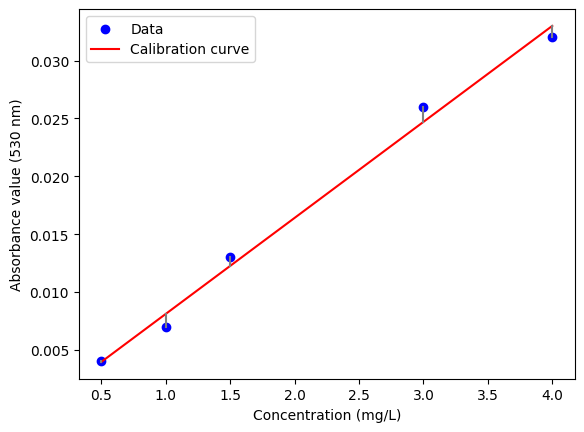

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ols_slope(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    return numerator / denominator

def ols_intercept(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = ols_slope(x, y)
    return y_mean - slope * x_mean

def ols(x, y):
    slope = ols_slope(x, y)
    intercept = ols_intercept(x, y)
    return slope, intercept

# Data
concentration = np.array([0.5, 1.0, 1.5, 3.0, 4.0])
absorbance = np.array([0.004, 0.007, 0.013, 0.026, 0.032])

# Fit a line to the data
slope, intercept = ols(concentration, absorbance)
line = slope * concentration + intercept

# Plot the calibration curve with the residuals
plt.scatter(concentration, absorbance, color='blue', label='Data')
plt.plot(concentration, line, color='red', label='Calibration curve')
for i in range(len(concentration)):
    plt.plot([concentration[i], concentration[i]], [absorbance[i], line[i]], color='gray')
plt.xlabel('Concentration (mg/L)')
plt.ylabel('Absorbance value (530 nm)')
plt.legend()
plt.show()

Isn't it great that we already have OLS functions to do this?

### Confidence Intervals

This is not the end of the story. We need to know how confident we are in the slope and intercept of the calibration curve. This is where confidence intervals come in. A confidence interval is a range of values that is likely to contain the true value of a parameter. In the case of the calibration curve, we are interested in the confidence intervals for the slope and intercept of the line.

#### A Theoretical Interlude

In OLS, it turns out the that the sum of squared residuals (SSR) is a key quantity in determining the confidence intervals for the slope and intercept. The SSR is defined as:

$$
SSR = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $y_i$ is the observed value of the dependent variable, $\hat{y}_i$ is the predicted value of the dependent variable, and $n$ is the number of data points. Looking at the plot above, this would correspond to summing the squares of the vertical distances (gray lines) between the observed data points and the line. The SSR is related to the variance of the residuals, which is defined as:

$$
\sigma^2 = \frac{SSR}{n-2}
$$

where $n$ is the number of data points. The variance of the residuals is used to calculate the standard errors of the slope and intercept, which are then used to calculate the confidence intervals. The standard errors of the slope and intercept are defined as:

$$
SE(\hat{\beta}_1) = \sqrt{\frac{\sigma^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}}
$$

$$
SE(\hat{\beta}_0) = \sqrt{\sigma^2 \left( \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2} \right)}
$$

where $\hat{\beta}_1$ is the estimated slope, $\hat{\beta}_0$ is the estimated intercept, $x_i$ is the value of the independent variable, $\bar{x}$ is the mean of the independent variable, and $n$ is the number of data points. The confidence intervals for the slope and intercept are then calculated as:

$$
CI(\hat{\beta}_1) = \hat{\beta}_1 \pm t_{\alpha/2} SE(\hat{\beta}_1)
$$

$$
CI(\hat{\beta}_0) = \hat{\beta}_0 \pm t_{\alpha/2} SE(\hat{\beta}_0)
$$

where $t_{\alpha/2}$ is the critical value of the t-distribution with $n-2$ degrees of freedom and a significance level of $\alpha/2$. The confidence intervals give us a range of values that is likely to contain the true value of the slope and intercept with a certain level of confidence.

#### Back to the Real World

Let's calculate the confidence intervals for the slope and intercept of the calibration curve. First, we will do this by writing our own functions. Then, we will use the `statsmodels` library to do the same thing.

In [7]:
# Calculate the residuals
residuals = absorbance - line

# Calculate the sum of the squared residuals
def sse(residuals):
    return np.sum(residuals ** 2)

# Test the function
print(sse(residuals))

4.4647058823529414e-06


Now, let's write a function to compute the variance of the residuals.

In [8]:
# Calculate the variance of the residuals
def variance(residuals):
    return sse(residuals) / (len(residuals) - 2)

# Test the function
print(variance(residuals))

1.488235294117647e-06


OK, now we can calculate the standard errors of the slope and intercept.

In [10]:
# Calculate the standard error of the slope
def se_slope(x, residuals):
    # numerator
    numerator = variance(residuals)
    # denominator
    x_mean = np.mean(x)
    denominator = np.sum((x - x_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Test the function
print(se_slope(concentration, residuals))

# Calculate the standard error of the intercept
def se_intercept(x, residuals):
    # numerator
    numerator = variance(residuals)
    # denominator
    x_mean = np.mean(x)
    denominator = len(x) * np.sum((x - x_mean) ** 2)
    return np.sqrt(numerator / denominator)

0.0004184333939712645
